In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

NAmes      326
CollgCr    188
OldTown    166
Sawyer     115
Edwards    112
Gilbert    112
Somerst    111
NWAmes      99
NridgHt     95
BrkSide     85
SawyerW     85
Mitchel     84
Crawfor     69
NoRidge     46
IDOTRR      43
Timber      42
StoneBr     38
SWISU       32
MeadowV     30
ClearCr     27
BrDale      21
Blmngtn     18
NPkVill     18
Veenker     15
Greens       7
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',


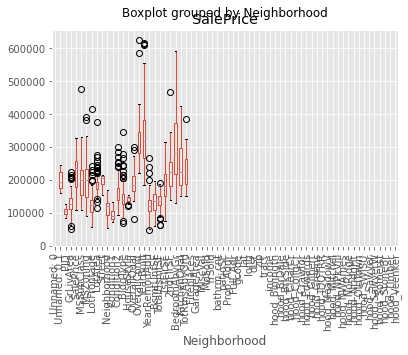

In [2]:
from clean_data import * 

# SIMPLE LINEAR MODEL

In [4]:
X1.columns

rm_cols = ['MSZoning_RL', 'YearRemodAdd', 'TotalBsmtSF', 'LotFrontage']
X1.drop(rm_cols, axis = 1, inplace = True)

/Users/Lena/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
# creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(X1,Y)

Y_P =  lm.predict(X1)

score=r2_score(Y,Y_P)
print('r2 score is %0.3f' %score)
print('mean_sqrd_error is= %.3f' %mean_squared_error(Y, Y_P))
print('root_mean_squared error of is= %.3f' %np.sqrt(mean_squared_error(Y, Y_P)))

r2 score is 0.631
mean_sqrd_error is= 80.565
root_mean_squared error of is= 8.976


# Linear Regression to be sure

In [9]:
lin_score = cross_val_score(lm, X1, Y, scoring = 'neg_mean_squared_error',cv = 10)

In [12]:
def disp_scores(mdl):
    print("Scores:", mdl)
    print('Mean ',  mdl.mean())
    print('STD', mdl.std())


In [13]:
lin_rmse_scores = np.sqrt(-lin_score)
disp_scores(lin_rmse_scores)

Scores: [ 9.87337323 10.04505973  9.34453492 10.47938256  7.89857061  8.32068586
  8.58163111  9.69616101  8.80019525  9.04513698]
Mean  9.208473126526028
STD 0.7812709919817575
